# OVERVIEW

FHFA (Federal Housing Finance Agency) records the city real time house price dynamics using the panel of 3-digit ZIP Code house price indices (HPIs) ranging from 1975 to 2015 spanning the entire United States. Annual House Price Indexes dataset has 35829 observations and 6 attributes.

# IMPORTING THE NECESSARY LIBRARIES

In [1]:
import pyspark

In [3]:
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession

In [4]:
spark1=SparkSession.builder.getOrCreate()

In [5]:
import os
os.getcwd()

'C:\\Users\\PRIYA'

# LOADING THE DATASET

In [6]:
datazip=spark1.read.csv("Zip4.csv",inferSchema=True,header=True)

# IMPORTING THE VISUALIZATION LIBRARIES

In [6]:
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# DETERMINING THE DATATYPE OF EVERY VARIABLE

In [7]:
datazip.printSchema()

root
 |-- Three-Digit ZIP Code: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Annual Change (%): string (nullable = true)
 |-- HPI: string (nullable = true)
 |-- HPI with 1990 base: string (nullable = true)
 |-- HPI with 2000 base: string (nullable = true)



# OVERVIEW OF THE DATASET

In [8]:
datazip.show()

+--------------------+----+-----------------+------+------------------+------------------+
|Three-Digit ZIP Code|Year|Annual Change (%)|   HPI|HPI with 1990 base|HPI with 2000 base|
+--------------------+----+-----------------+------+------------------+------------------+
|                  10|1975|                .|100.00|             23.29|             21.80|
|                  10|1976|             7.02|107.02|             24.92|             23.33|
|                  10|1977|             6.99|114.50|             26.66|             24.96|
|                  10|1978|             7.19|122.73|             28.58|             26.76|
|                  10|1979|            16.49|142.97|             33.29|             31.17|
|                  10|1980|            12.18|160.39|             37.35|             34.97|
|                  10|1981|             7.87|173.00|             40.29|             37.72|
|                  10|1982|            12.47|194.58|             45.31|             42.42|

# DETRMINING THE NUMBER OF OBSERVATIONS IN THE DATASET

In [18]:
datazip.count()

35829

# CHANGING THE DATATYPE OF THE VARIABLE

In [9]:
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.types import StringType

In [10]:
datazip = datazip.withColumn("Annual Change (%)", datazip["Annual Change (%)"].cast(FloatType()))

In [11]:
datazip = datazip.withColumn("HPI", datazip["HPI"].cast(FloatType()))

In [12]:
datazip = datazip.withColumn("HPI with 1990 base", datazip["HPI with 1990 base"].cast(FloatType()))

In [13]:
datazip = datazip.withColumn("HPI with 2000 base", datazip["HPI with 2000 base"].cast(FloatType()))

In [14]:
datazip = datazip.withColumn("Year", datazip["Year"].cast(StringType()))

In [15]:
datazip = datazip.withColumn("Three-Digit ZIP Code", datazip["Three-Digit ZIP Code"].cast(StringType()))

# INDIVIDUALLY DETERMING IN EVERY COLUMN FROM THE COUNT IF THERE ARE ANY NA VALUES

In [19]:
datazip.describe(["Three-Digit ZIP Code"]).show()

+-------+--------------------+
|summary|Three-Digit ZIP Code|
+-------+--------------------+
|  count|               35829|
|   mean|  497.71369560970163|
| stddev|  284.80620564941995|
|    min|                  10|
|    max|                 999|
+-------+--------------------+



In [20]:
datazip.describe(["Year"]).show()

+-------+------------------+
|summary|              Year|
+-------+------------------+
|  count|             35829|
|   mean|1997.7457366937397|
| stddev|12.264385052167306|
|    min|              1975|
|    max|              2018|
+-------+------------------+



In [21]:
datazip.describe(["Annual Change (%)"]).show()

+-------+-----------------+
|summary|Annual Change (%)|
+-------+-----------------+
|  count|            34616|
|   mean|3.913496648643626|
| stddev|6.372764631848708|
|    min|           -44.16|
|    max|            84.97|
+-------+-----------------+



In [22]:
datazip.describe(["HPI"]).show()

+-------+-----------------+
|summary|              HPI|
+-------+-----------------+
|  count|            35617|
|   mean|293.8579415157669|
| stddev|205.5355445493114|
|    min|            53.28|
|    max|          2857.74|
+-------+-----------------+



In [23]:
datazip.describe(["HPI with 1990 base"]).show()

+-------+------------------+
|summary|HPI with 1990 base|
+-------+------------------+
|  count|             34480|
|   mean| 136.8779405297923|
| stddev|  61.3824818572303|
|    min|             17.12|
|    max|            669.89|
+-------+------------------+



In [24]:
datazip.describe(["HPI with 2000 base"]).show()

+-------+------------------+
|summary|HPI with 2000 base|
+-------+------------------+
|  count|             35404|
|   mean|  98.5337671119471|
| stddev|42.544043453269545|
|    min|              9.15|
|    max|            397.17|
+-------+------------------+



In [ ]:
#WE OBSERVE THAT COUNT OF ANNUAL CHANGE,HPI,HPW WITH 2000 BASE,HPI WITH 1990 BASE IS LESS THAN THE ORIGINAL COUNT OF 35829 INDICATING THAT THESE COLUMNS HAVE NA VALUES

# HANDLING THE NA VALUES BY SUBSTITUTING THEM WITH ZERO

In [25]:
 datazip = datazip.fillna({'Annual Change (%)':'0'})

In [26]:
datazip = datazip.fillna({'HPI':'0'})

In [27]:
datazip = datazip.fillna({'HPI with 1990 base':'0'})

In [28]:
datazip = datazip.fillna({'HPI with 2000 base':'0'})

# BUILDING THE CORRELATION MATRIX

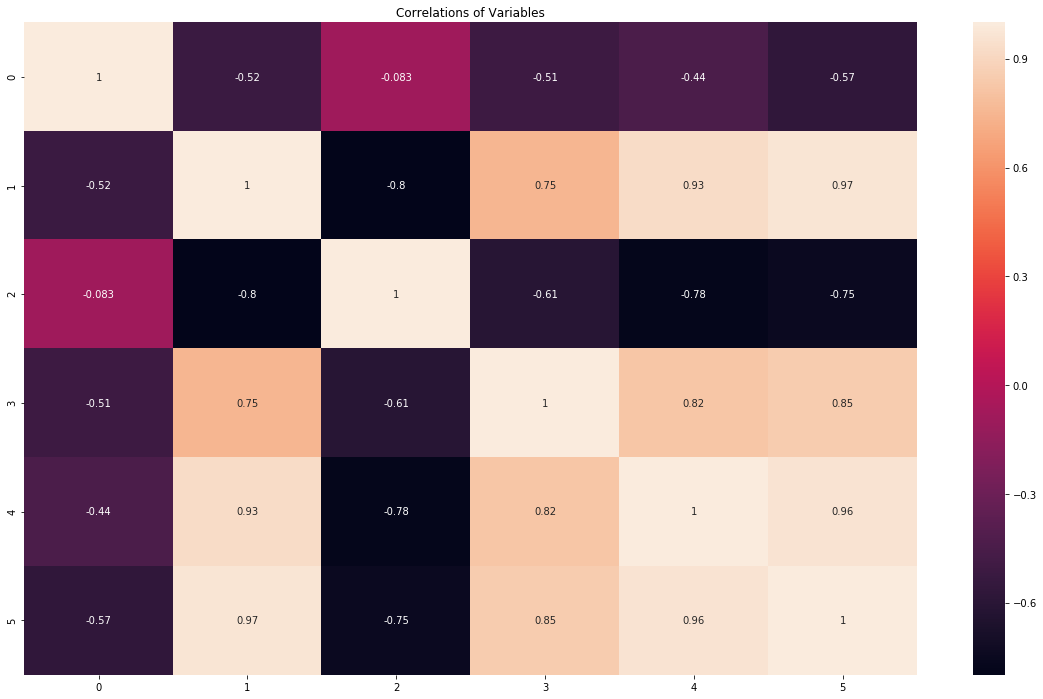

In [32]:
from pyspark.mllib.stat import Statistics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns

# df = sqlCtx.read.format('com.databricks.spark.csv').option('header', 'true').option('inferschema', 'true').load('corr_test.csv')
df = datazip
col_names = df.columns
features = df.rdd.map(lambda row: row[0:])
corr_mat=Statistics.corr(features, method="pearson")
corr_df = pd.DataFrame(corr_mat)
plt.figure(figsize=(20,12))
sb.heatmap(corr_df.corr(),annot=True)
plt.title("Correlations of Variables")
plt.show()

# CREATING A TEMPORARY TABLE NAMED DATAZIP

In [33]:
datazip.createOrReplaceTempView("Datazip")

# EXTRACTING THE RELEVANT COLUMNS BY USING SPARKSQL

In [34]:
zipresult=spark1.sql("""select `Three-Digit ZIP Code`AS threedigitzip,HPI FROM Datazip""")
#result3=spark.sql("select Zhvi,PeakQuarter from Dataset1 ")

In [35]:
zipresult1=zipresult.groupBy('threedigitzip').max().collect()

In [36]:
from pyspark.sql.types import *

cSchema1 = StructType([StructField("threedigitzip", StringType())\
                      ,StructField("HPI", FloatType())])

zipresult2 = spark1.createDataFrame(zipresult1,schema=cSchema1) 

In [37]:
zipresult3=zipresult2.sort(zipresult2.HPI.desc()).collect()

In [38]:
cSchema2 = StructType([StructField("threedigitzip", StringType())\
                      ,StructField("HPI", FloatType())])

zipresult4 = spark1.createDataFrame(zipresult3,schema=cSchema2) 

In [39]:
zipresult5=zipresult4.take(50)

In [40]:
from pyspark.sql.types import *

cSchema3 = StructType([StructField("threedigitzip", StringType())\
                      ,StructField("HPI", FloatType())])

zipresult5 = spark1.createDataFrame(zipresult5,schema=cSchema3) 

# CREATING THE RDDS

In [43]:
resultzip=zipresult5.rdd.map(lambda row : row.threedigitzip).collect()


In [42]:
resultzip1=zipresult5.rdd.map(lambda row : row.HPI).collect()


# PLOTTING THE GRAPH OF HPI BY THREE DIGIT ZIP CODE

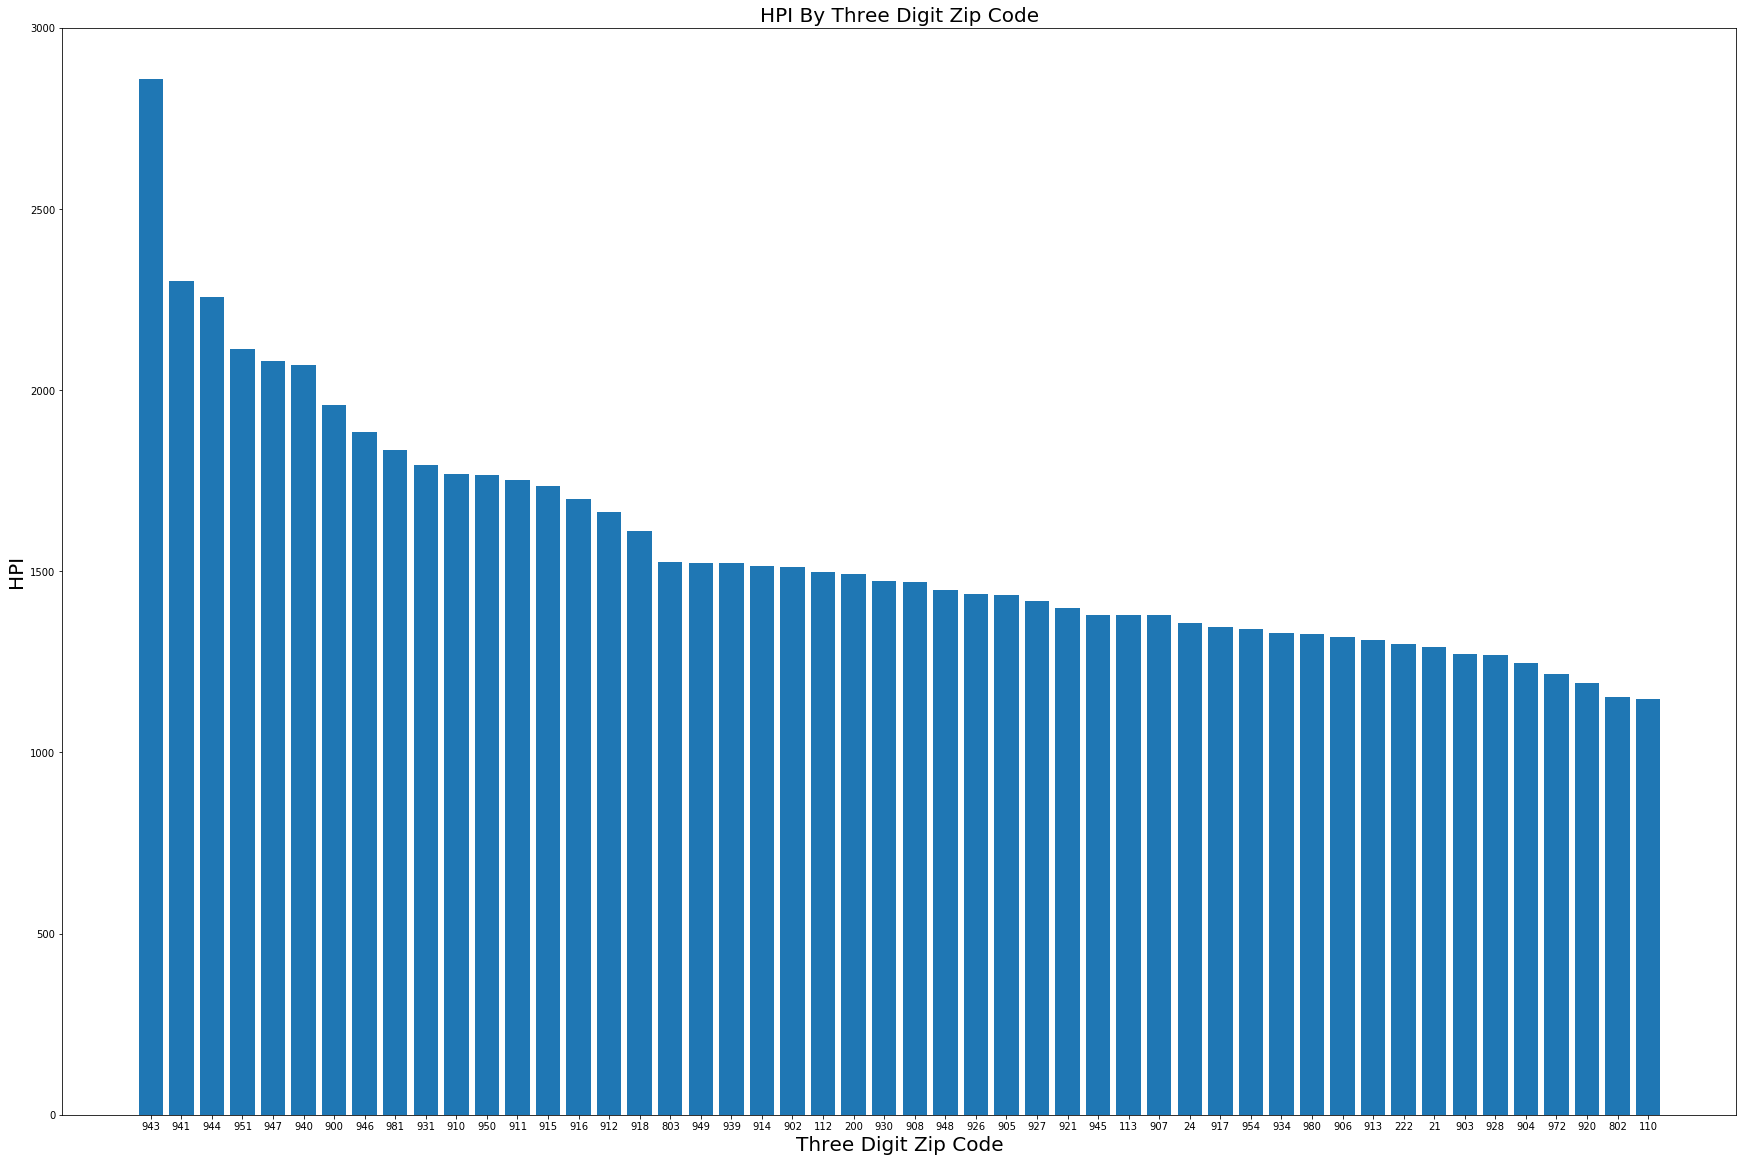

In [44]:
plt.figure(figsize=(30,20))
plt.bar(resultzip,resultzip1)
plt.xlabel("Three Digit Zip Code",fontsize=20)
plt.ylabel("HPI",fontsize=20)
plt.title("HPI By Three Digit Zip Code",fontsize=20)
plt.show()

# EXTRACTING THE RELEVANT COLUMNS BY USING SPARKSQL

In [45]:
zipresult6=spark1.sql("""select `Three-Digit ZIP Code`AS threedigitzip, `HPI with 2000 base` AS Hpitwothousand FROM Datazip""")

In [46]:
zipresult7=zipresult6.groupBy('threedigitzip').max().collect()

In [47]:
from pyspark.sql.types import *

cSchema4 = StructType([StructField("threedigitzip", StringType())\
                      ,StructField("Hpitwothousand", FloatType())])

zipresult8 = spark1.createDataFrame(zipresult7,schema=cSchema4) 

In [48]:
zipresult9=zipresult8.take(50)

In [49]:
from pyspark.sql.types import *

cSchema6 = StructType([StructField("threedigitzip", StringType())\
                      ,StructField("Hpitwothousand", FloatType())])

zipresult10 = spark1.createDataFrame(zipresult9,schema=cSchema6) 

# CREATING THE RDDS

In [50]:
resultzip3=zipresult10.rdd.map(lambda row : row.threedigitzip).collect()


In [51]:
resultzip4=zipresult10.rdd.map(lambda row : row.Hpitwothousand).collect()


# PLOTTING THE GRAPH OF HPI WITH 2000 BASE BY THREE DIGIT ZIP CODE

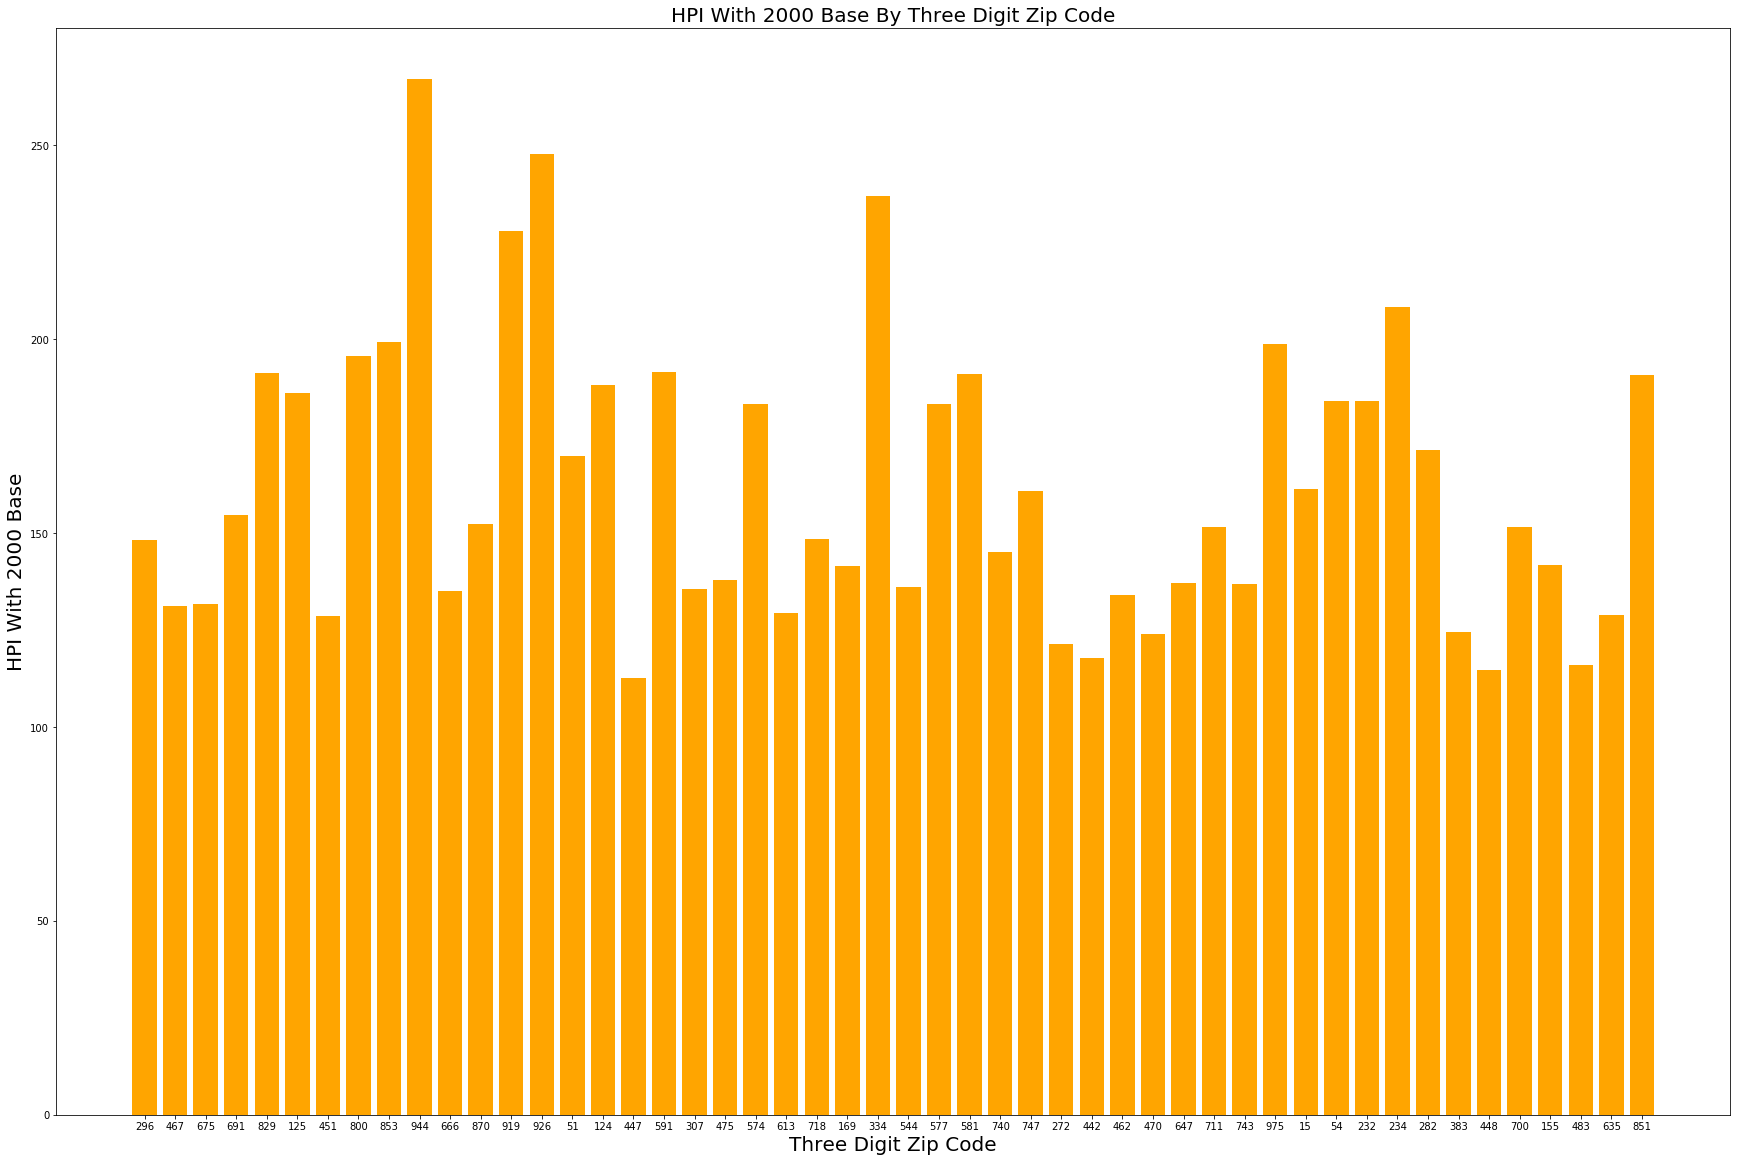

In [52]:
plt.figure(figsize=(30,20))
plt.bar(resultzip3,resultzip4,color=["orange"])
plt.xlabel("Three Digit Zip Code",fontsize=20)
plt.ylabel("HPI With 2000 Base",fontsize=20)
plt.title("HPI With 2000 Base By Three Digit Zip Code",fontsize=20)
plt.show()

In [ ]:
# EXTRACTING THE RELEVANT COLUMNS BY USING SPARKSQL

In [53]:
zipresult11=spark1.sql("""select `Three-Digit ZIP Code`AS threedigitzip, `Annual Change (%)` AS AnnualChange FROM Datazip""")

In [54]:
zipresult12=zipresult11.groupBy('threedigitzip').max().collect()

In [55]:
from pyspark.sql.types import *

cSchema7 = StructType([StructField("threedigitzip", StringType())\
                      ,StructField("AnnualChange", FloatType())])

zipresult13 = spark1.createDataFrame(zipresult12,schema=cSchema7)

In [56]:
zipresult14=zipresult13.sort(zipresult13.AnnualChange.desc()).collect()

In [57]:
cSchema8 = StructType([StructField("threedigitzip", StringType())\
                      ,StructField("AnnualChange", FloatType())])

zipresult15 = spark1.createDataFrame(zipresult14,schema=cSchema8) 

In [58]:
zipresult16=zipresult15.take(50)

In [59]:
cSchema9 = StructType([StructField("threedigitzip", StringType())\
                      ,StructField("AnnualChange", FloatType())])

zipresult17 = spark1.createDataFrame(zipresult16,schema=cSchema9) 

# CREATING THE RDDS

In [60]:
resultzip5=zipresult17.rdd.map(lambda row : row.threedigitzip).collect()

In [61]:
resultzip6=zipresult17.rdd.map(lambda row : row.AnnualChange).collect()

# PLOTTING THE GRAPH OF ANNUAL CHANGE BY THREE DIGIT ZIP CODE

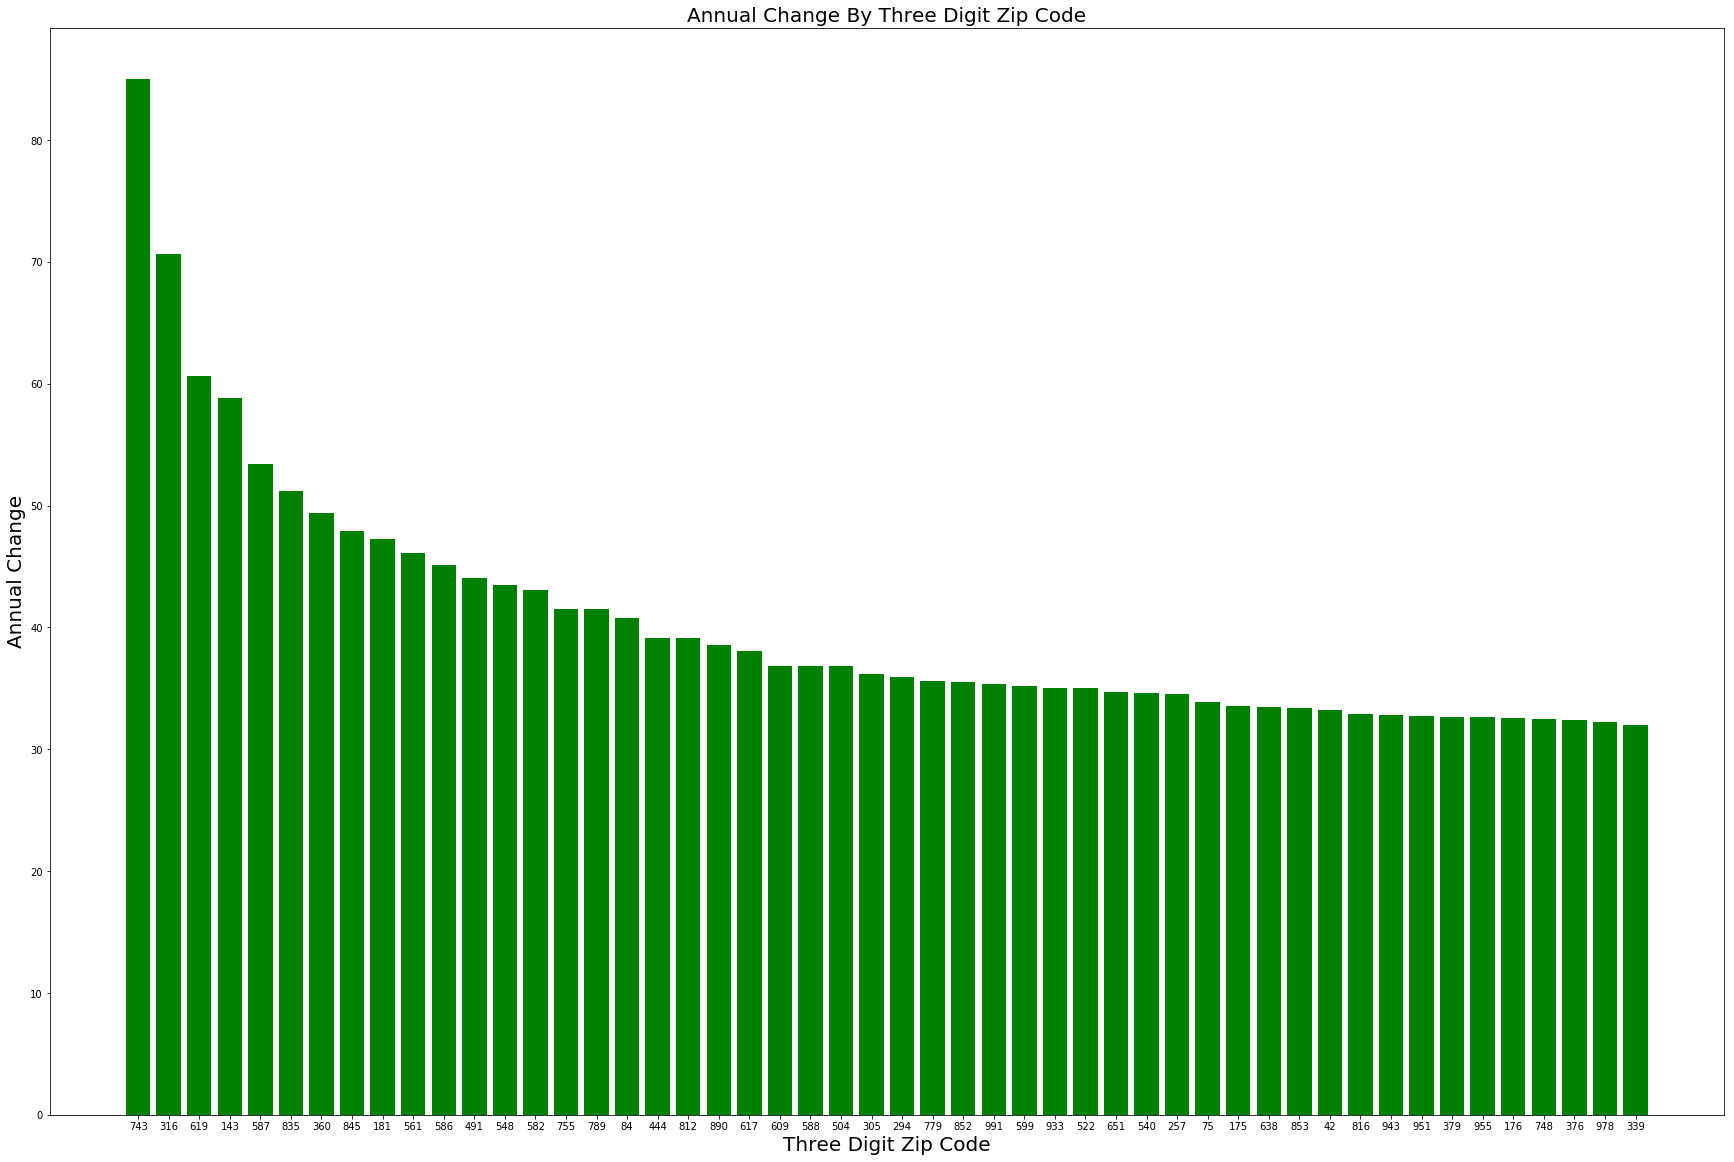

In [62]:
plt.figure(figsize=(30,20))
plt.bar(resultzip5,resultzip6,color=["green"])
plt.xlabel("Three Digit Zip Code",fontsize=20)
plt.ylabel("Annual Change",fontsize=20)
plt.title("Annual Change By Three Digit Zip Code",fontsize=20)
plt.show()

# CONVERTING THE DATAFRAME TO PANDAS DATAFRAME

In [63]:
test_df=datazip.toPandas()

# TIME SERIES PLOT OF ANNUAL CHANGE VS YEAR

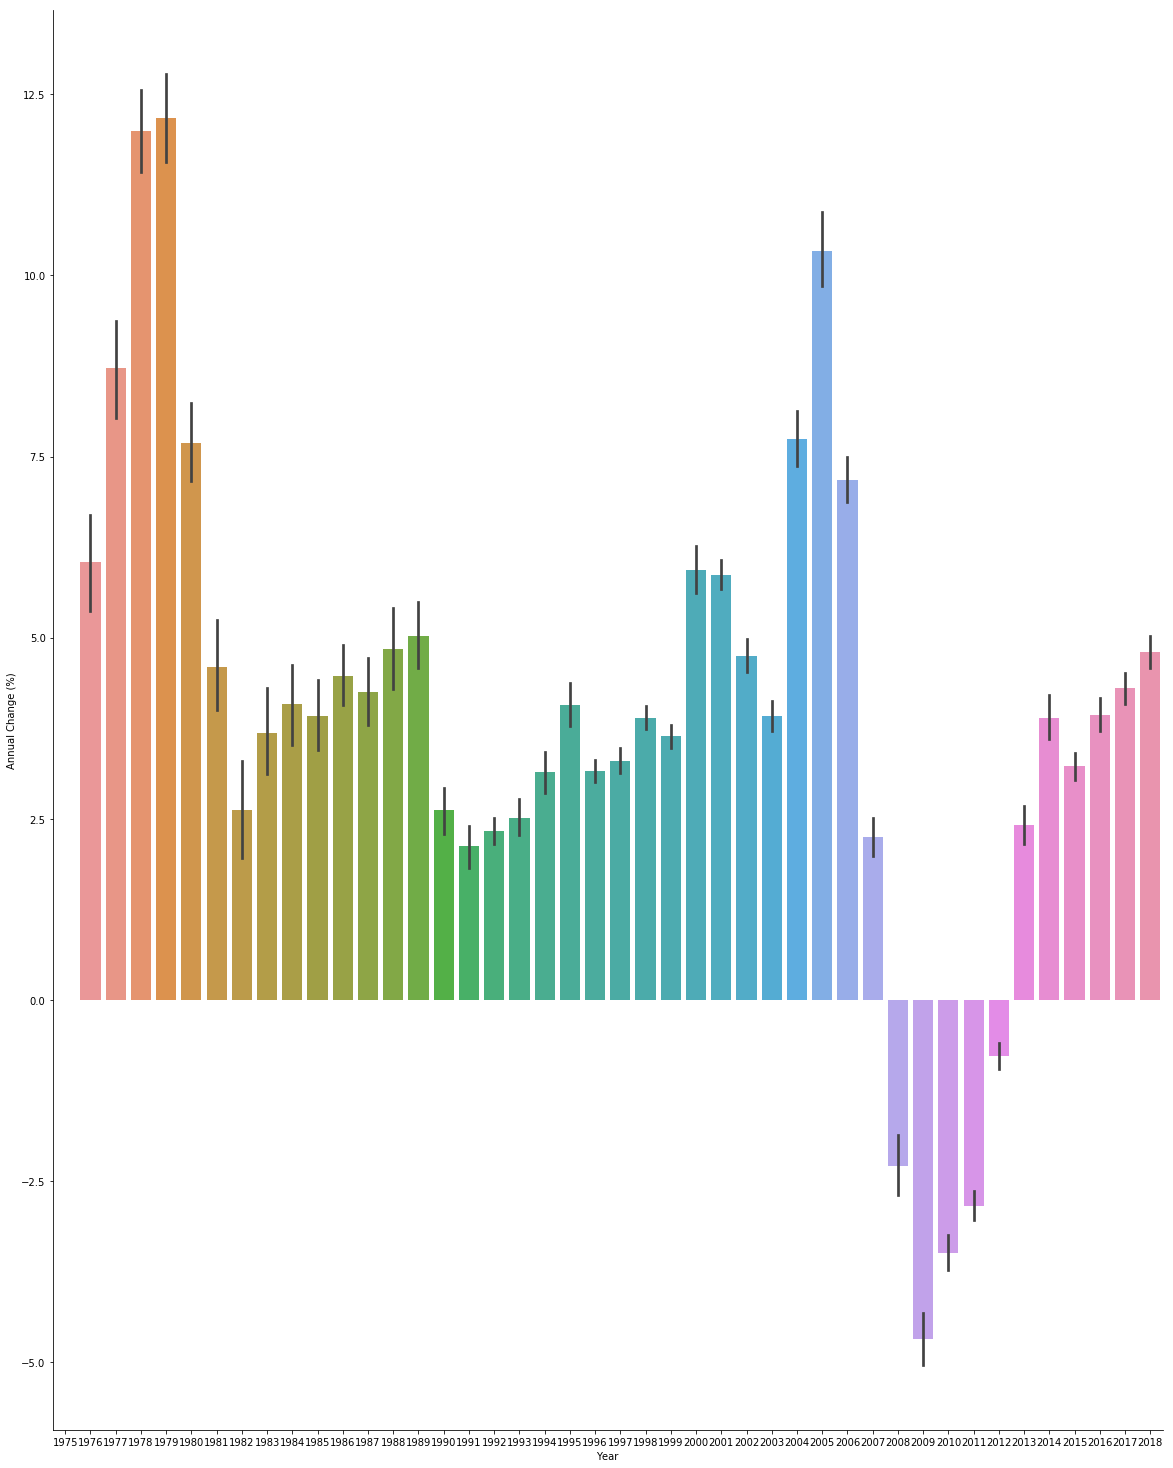

In [64]:
sns.catplot(x = "Year", y = "Annual Change (%)",data = test_df,kind="bar",height=20.5, aspect=0.8)


# TIME SERIES PLOT OF HPI VS YEAR

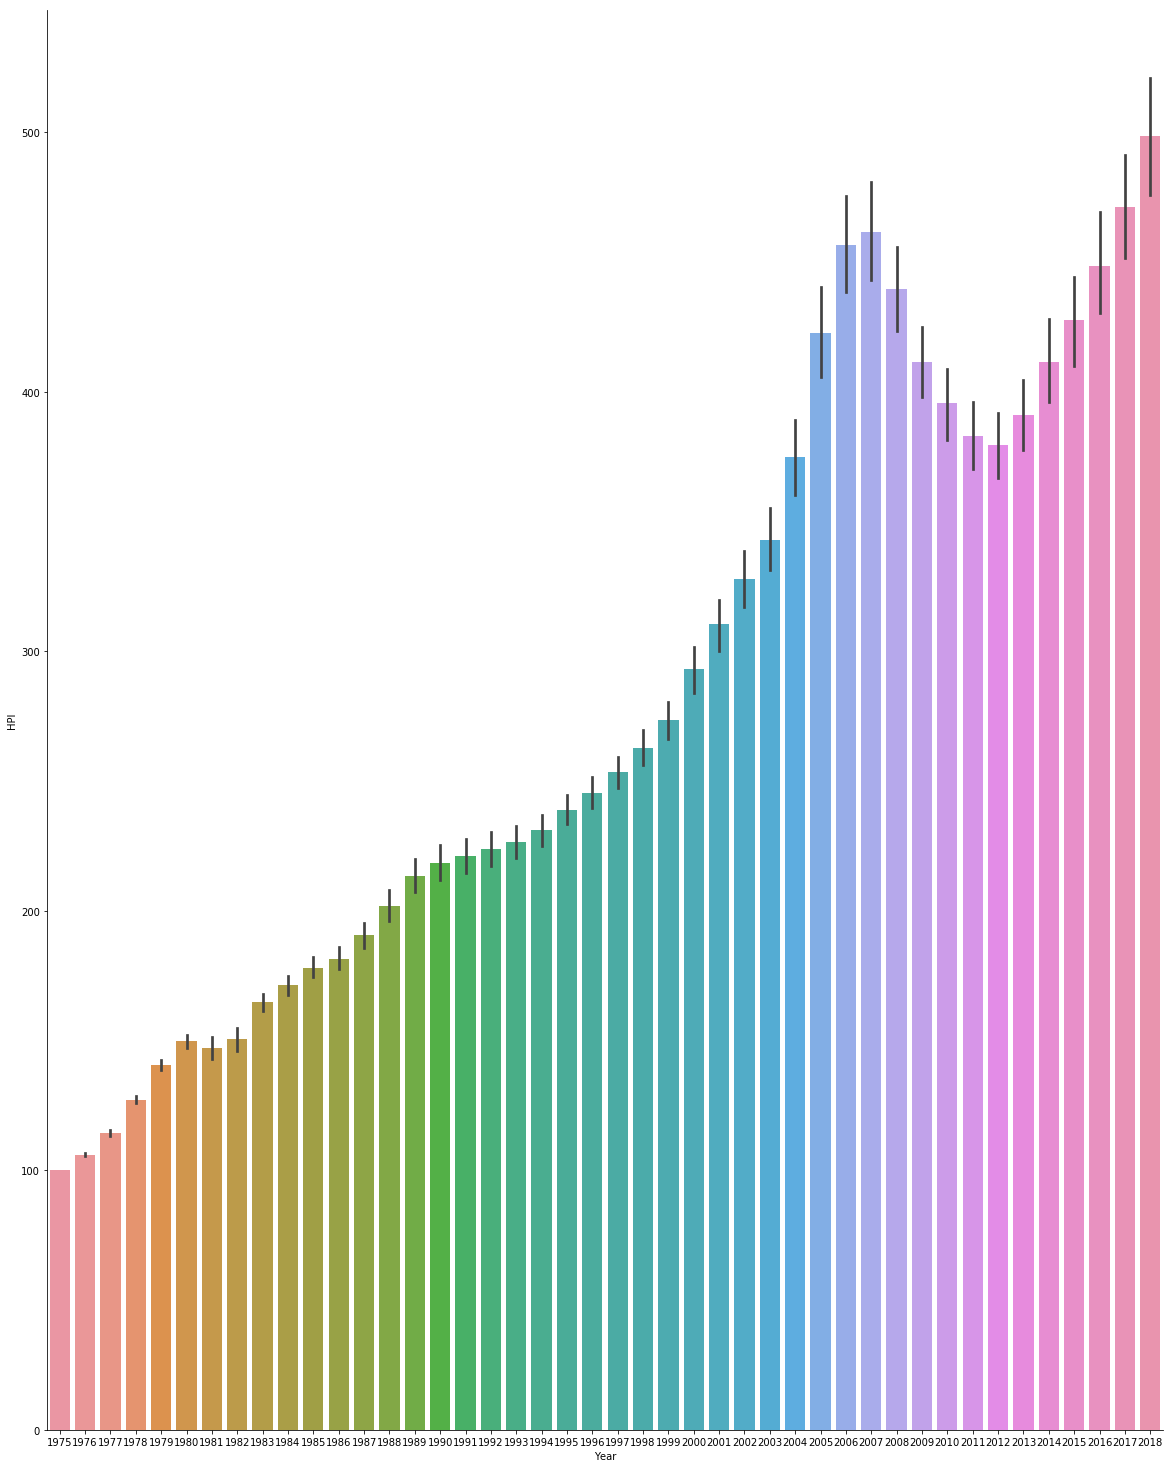

In [65]:
sns.catplot(x = "Year", y = "HPI",data = test_df,kind="bar",height=20.5, aspect=0.8)


# TIME SERIES PLOT OF HPI WITH 2000 BASE VS YEAR

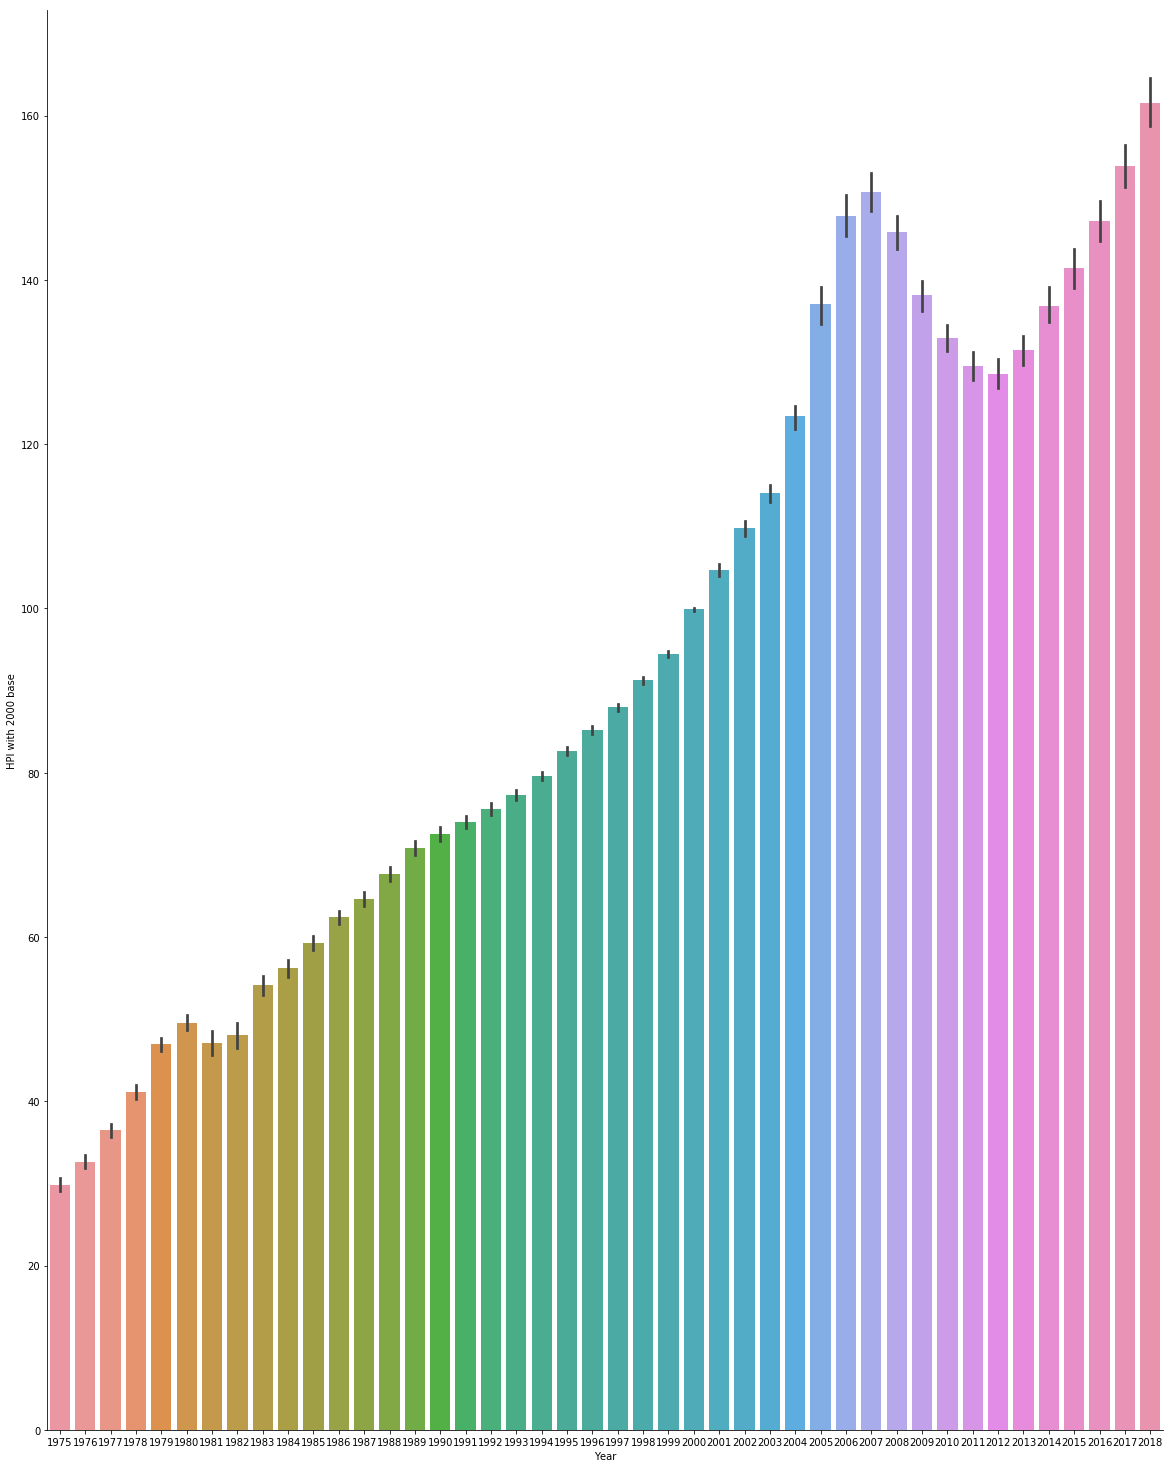

In [66]:
sns.catplot(x = "Year", y = "HPI with 2000 base",data = test_df,kind="bar",height=20.5, aspect=0.8)


# BUILDING LINEAR REGRESSION MODEL TO PREDICT THE HPI VALUE BY IMPORTING THE NECESSARY LIBRARIES

In [67]:
from pyspark.ml.regression import LinearRegression

In [68]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [69]:
featureAssembler1=VectorAssembler(inputCols=["Annual Change (%)","HPI with 1990 base","HPI with 2000 base"],outputCol="Independent features1")

In [71]:
output1=featureAssembler1.transform(datazip)

In [72]:
output1.select("Independent features1").show()

+---------------------+
|Independent features1|
+---------------------+
| [0.0,23.290000915...|
| [7.01999998092651...|
| [6.98999977111816...|
| [7.19000005722045...|
| [16.4899997711181...|
| [12.1800003051757...|
| [7.86999988555908...|
| [12.4700002670288...|
| [5.57999992370605...|
| [15.3599996566772...|
| [12.1000003814697...|
| [14.6199998855590...|
| [21.4200000762939...|
| [15.6199998855590...|
| [2.55999994277954...|
| [-2.0299999713897...|
| [-3.3699998855590...|
| [-2.0499999523162...|
| [-1.4600000381469...|
| [-1.3300000429153...|
+---------------------+
only showing top 20 rows



In [73]:
finalizedData1=output1.select("Independent features1","HPI")
finalizedData1.show()

+---------------------+------+
|Independent features1|   HPI|
+---------------------+------+
| [0.0,23.290000915...| 100.0|
| [7.01999998092651...|107.02|
| [6.98999977111816...| 114.5|
| [7.19000005722045...|122.73|
| [16.4899997711181...|142.97|
| [12.1800003051757...|160.39|
| [7.86999988555908...| 173.0|
| [12.4700002670288...|194.58|
| [5.57999992370605...|205.43|
| [15.3599996566772...|236.98|
| [12.1000003814697...|265.64|
| [14.6199998855590...|304.47|
| [21.4200000762939...|369.68|
| [15.6199998855590...|427.42|
| [2.55999994277954...|438.36|
| [-2.0299999713897...|429.44|
| [-3.3699998855590...|414.98|
| [-2.0499999523162...|406.45|
| [-1.4600000381469...| 400.5|
| [-1.3300000429153...|395.19|
+---------------------+------+
only showing top 20 rows



# SPLITTING THE DATA INTO TRAINING AND TESTING

In [74]:
train_data,test_data=finalizedData1.randomSplit([0.8,0.2])

# BUILDING THE LINEAR REGRESSION MODEL

In [75]:
regressor=LinearRegression(featuresCol="Independent features1",labelCol="HPI")

In [76]:
regressor=regressor.fit(train_data)

In [77]:
predresults=regressor.evaluate(test_data)

In [35]:
predresults.predictions.show()

+---------------------+---+-------------------+
|Independent features1|HPI|         prediction|
+---------------------+---+-------------------+
|            (3,[],[])|0.0|-49.574472550974974|
|            (3,[],[])|0.0|-49.574472550974974|
|            (3,[],[])|0.0|-49.574472550974974|
|            (3,[],[])|0.0|-49.574472550974974|
|            (3,[],[])|0.0|-49.574472550974974|
|            (3,[],[])|0.0|-49.574472550974974|
|            (3,[],[])|0.0|-49.574472550974974|
|            (3,[],[])|0.0|-49.574472550974974|
|            (3,[],[])|0.0|-49.574472550974974|
|            (3,[],[])|0.0|-49.574472550974974|
|            (3,[],[])|0.0|-49.574472550974974|
|            (3,[],[])|0.0|-49.574472550974974|
|            (3,[],[])|0.0|-49.574472550974974|
|            (3,[],[])|0.0|-49.574472550974974|
|            (3,[],[])|0.0|-49.574472550974974|
|            (3,[],[])|0.0|-49.574472550974974|
|            (3,[],[])|0.0|-49.574472550974974|
|            (3,[],[])|0.0|-49.574472550

# DETERMING THE RMSE AND R2 VALUE OF TRAIN DATA

In [78]:
trainingSummary = regressor.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 143.836307
r2: 0.515626


# DETERMINING THE RMSE OF THE TEST DATA

In [79]:
print("Root Mean Squared Error (RMSE) on test data = %g" % predresults.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 142.817


# DETERMING THE R2 OF THE TEST DATA

In [80]:
lr_predictions = regressor.transform(test_data)
lr_predictions.show()
lr_predictions.select("prediction","HPI","Independent features1").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="HPI",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+---------------------+---+------------------+
|Independent features1|HPI|        prediction|
+---------------------+---+------------------+
|            (3,[],[])|0.0|-53.51840021347031|
|            (3,[],[])|0.0|-53.51840021347031|
|            (3,[],[])|0.0|-53.51840021347031|
|            (3,[],[])|0.0|-53.51840021347031|
|            (3,[],[])|0.0|-53.51840021347031|
|            (3,[],[])|0.0|-53.51840021347031|
|            (3,[],[])|0.0|-53.51840021347031|
|            (3,[],[])|0.0|-53.51840021347031|
|            (3,[],[])|0.0|-53.51840021347031|
|            (3,[],[])|0.0|-53.51840021347031|
|            (3,[],[])|0.0|-53.51840021347031|
|            (3,[],[])|0.0|-53.51840021347031|
|            (3,[],[])|0.0|-53.51840021347031|
|            (3,[],[])|0.0|-53.51840021347031|
|            (3,[],[])|0.0|-53.51840021347031|
|            (3,[],[])|0.0|-53.51840021347031|
|            (3,[],[])|0.0|-53.51840021347031|
|            (3,[],[])|0.0|-53.51840021347031|
|            

# THE ACCURACY OF THE LINEAR REGRESSION MODEL ON BOTH THE TRAINING AND TESTING DATA IS 51% WHICH MEANS THAT THE MODEL IS NOT A GOOD FIT TO THE DATA.HENCE THE MODEL SHOULD BE MORE FINE TUNED OR SOME OTHER MODEL SHOULD BE IMPLEMENTED.I WILL WORK ON IMPROVING THE MODEL ACCURACY